# An Overview of Natural Language Processing with Python NLTK

### Introduction

In the broad field of artificial intelligence, the ability to parse and understand natural language is an important goal with many types of application. Online retailers and service providers may wish to analyse the feedback of their reviews; governments may need to understand the content of large-scale surveys and responses; or researchers may attempt to determine the sentiments expressed towards certain topics or people on social media. There are many areas where the processing of natural language is required, and this tutorial will step through some of the key elements involved. 

The difficulty of understanding natural language is tied to the fact that text data is unstructured. This means it doesn’t come in an easy format to analyse and interpret. When performing data analysis, we want to be able to evaluate the information quantitatively, but text is inherently qualitative. Natural language processing is the process of transforming a piece of text into a structured format that a computer can process and begin to understand.

### Dataset

To perform natural language processing, we need some data containing natural language to work with. Often you can collect your own data for projects by scraping the web or downloading existing files in txt, csv, or json format. The NLTK library helpfully comes with a few large datasets built in and these are easy to import directly. These include classic novels, film scripts, tweets, speeches, and even real-life conversations overheard in New York. We will be using a set of movie reviews for our analysis. 

After importing a selected dataset, you can call a ‘readme’ function to learn more about the structure and purpose of the collected data. 


In [2]:
import nltk
from nltk.corpus import movie_reviews
# movie_reviews.readme()

We can start trying to understand the data by simply printing words and frequencies to the console, to see what we are dealing with. To get the entire collection of movie reviews as one chunk of data, we use the raw text function (though we will limit what we print to the terminal to the first 3000 characters for readability).

In [9]:
raw = movie_reviews.raw()
print(raw[:3000])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

As you will see, this outputs each of the reviews with no formatting at all. If we print just the first element, the output is a single character.

In [3]:
print(raw[0])

p


We can use the ‘words’ function to split our movie reviews into individual words, and store them all in one corpus. Now we can start to analyse things like individual words and their frequencies within the corpus.

In [4]:
corpus = movie_reviews.words()
print(corpus)

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [5]:
print(corpus[0])

plot


We can calculate the frequency distribution (counting the number of times each word is used in the corpus), and then plot or print out the top k words. This should show us which words are used most often. Let’s take a look at the top 50. 

<FreqDist with 39768 samples and 1583820 outcomes>
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595), (')', 11781), ('(', 11664), ('as', 11378), ('with', 10792), ('for', 9961), ('his', 9587), ('this', 9578), ('film', 9517), ('i', 8889), ('he', 8864), ('but', 8634), ('on', 7385), ('are', 6949), ('t', 6410), ('by', 6261), ('be', 6174), ('one', 5852), ('movie', 5771), ('an', 5744), ('who', 5692), ('not', 5577), ('you', 5316), ('from', 4999), ('at', 4986), ('was', 4940), ('have', 4901), ('they', 4825), ('has', 4719), ('her', 4522), ('all', 4373), ('?', 3771), ('there', 3770), ('like', 3690), ('so', 3683), ('out', 3637)]


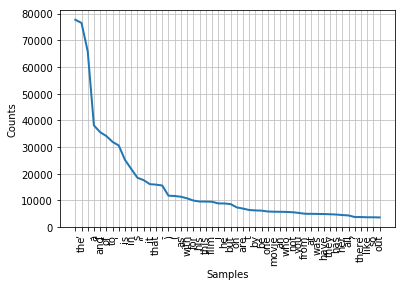

In [6]:
freq_dist = nltk.FreqDist(corpus)
print(freq_dist)
print(freq_dist.most_common(50))
freq_dist.plot(50)

The first line of our output is telling us how many total words are in our corpus (1,583,820 outcomes), and how many unique words this contains (39,768 samples). The next line then begins the list of the top 50 most frequently appearing words, and we can save our plotted graph as a .png file.

We can start to see that attempting analysis on the text in its natural format is not yielding useful results - the inclusion of punctuation and common words such as ‘the’ does not help us understand the content or meaning of the text. The next few sections will explain some of the most common and useful steps involved in NLP, which begin to transform the given text documents into something that can be analysed and utilised more effectively.

### Tokenization

When we previously split our raw text document into individual words, this was a process very similar to the concept of tokenisation. Tokenisation aims to take a document and break it down into individual ‘tokens’ (often words), and store these in a new data structure. Other forms of minor formatting can be applied here too. For example, all punctuation could be removed.

To test this out on an individual review, first we will need to split our raw text document up, this time by review instead of by word.


In [7]:
reviews = []
for i in range (0,len(movie_reviews.fileids())):
    reviews.append(movie_reviews.raw(movie_reviews.fileids()[i]))

The movie reviews are stored according to a file ID such as 'neg/cv000_29416.txt', so this code loops through each of the file IDs, and assigning the raw text associated with that ID to an empty ‘reviews’ list. We will now be able to call, for example, review[0] to look at the first review by itself.

In [9]:
print(reviews[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

Now taking the first review in its natural form, we can break it down even further using tokenizers. The sent_tokenize function will split the review into tokens of sentences, and word_tokenize will split the review into tokens of words. 

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
sentences = nltk.sent_tokenize(reviews[0])
words = nltk.word_tokenize(reviews[0])
print(sentences[0])
print(words[0])

plot : two teen couples go to a church party , drink and then drive .
plot


There are lots of options for tokenizing in NLTK which you can read about in the API documentation [here](http://www.nltk.org/api/nltk.tokenize.html). We are going to combine a regular expression tokenizer to remove punctuation, along with the Python function for transforming strings to lowercase, to build our final tokenizer.

In [11]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(reviews[0].lower())
print(tokens)

['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'what', 's', 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mind', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', 'mess', 'with', 'your', 'head', 'and', 'such', 'lost', 'highway', 'memento', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of', 'making', 'all', 'types', 'of', 'films', 'and', 'these', 'folks', 'just', 'didn', 't', 'snag', 'this',

### Stop Words

We’re starting to head towards a more concise representation of the reviews, which only holds important and useful parts of the text. One further key step in NLP is the removal of stop words, for example ‘the’, ‘and’, ‘to’, which add no value in terms of content or meaning and are used very frequently in almost all forms of text. To do this we can run our document against a predefined list of stop words and remove matching instances.

In [12]:
from nltk.corpus import stopwords
tokens = [token for token in tokens if token not in stopwords.words('english')]
print(tokens)

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scenes', 'tons', 'weird', '

This has reduced the number of tokens in the first review from 726 to 343 - so we can see that nearly half the words in this instance were essentially redundant. 

### Lemmatization and Stemming

Often different inflections of a word have the same general meaning (at least in terms of data analysis), and it may be useful to group them together as one. For example, instead of handling the words ‘walk’, ‘walks’, ‘walked’, ‘walking’ individually, we may want to treat them all as the same word. There are two common approaches to this - lemmatization and stemming.

Lemmatization takes any inflected form of a word and returns its base form - the lemma. To achieve this, we need some context to the word use, such as whether it is a noun or adjective. Stemming is a somewhat cruder attempt at generating a root form, often returning a word which is simply the first few characters that are consistent in any form of the word (but not always a real word itself). To understand this better, let's test an example.

First we’ll import and define a stemmer and lemmatizer - there are different versions available but these are two of the most popularly used. Next we’ll test the resulting word generated by each approach.

In [13]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

test_word = "worrying"
word_stem = stemmer.stem(test_word)
word_lemmatise = lemmatizer.lemmatize(test_word)
word_lemmatise_verb = lemmatizer.lemmatize(test_word, pos="v")
word_lemmatise_adj = lemmatizer.lemmatize(test_word, pos="a")
print(word_stem, word_lemmatise, word_lemmatise_verb, word_lemmatise_adj)

worri worrying worry worrying


As you can see, the stemmer in this case has outputted the word ‘worri’ which is not a real word, but a stemmed version of ‘worry’. For the lemmatizer to correctly lemmatize the word ‘worrying’ it needs to know whether this word has been used as a verb or adjective. The process for assigning these contextual tags is called part-of-speech tagging and is explained in the following section. Although stemming is a less thorough approach compared to lemmatization, in practise it oftens perform equally or only negibly worse. You can test other words such as ‘walking’ and see that in this case the stemmer and lemmatizer would give the same result.  

### Part-of-Speech Tagging

As briefly mentioned, part-of-speech tagging refers to tagging a word with a grammatical category. To do this requires context on the sentence in which the word appears - for example, which words it is adjacent to, and how its definition could change depending on this. The following function can be called to view a list of all possible part-of-speech tags.

In [14]:
# nltk.help.upenn_tagset()

The extensive list includes PoS tags such as VB (verb in base form), VBD (verb in past tense), VBG (verb as present participle) and so on.

To generate the tags for our tokens, we simply import the library and call the pos_tag function.

In [15]:
from nltk import pos_tag
pos_tokens = nltk.pos_tag(tokens) 
print(pos_tokens)

[('plot', 'NN'), ('two', 'CD'), ('teen', 'NN'), ('couples', 'NNS'), ('go', 'VBP'), ('church', 'NN'), ('party', 'NN'), ('drink', 'VBP'), ('drive', 'JJ'), ('get', 'NN'), ('accident', 'JJ'), ('one', 'CD'), ('guys', 'NN'), ('dies', 'VBZ'), ('girlfriend', 'VBP'), ('continues', 'VBZ'), ('see', 'VBP'), ('life', 'NN'), ('nightmares', 'NNS'), ('deal', 'VBP'), ('watch', 'JJ'), ('movie', 'NN'), ('sorta', 'NN'), ('find', 'VBP'), ('critique', 'JJ'), ('mind', 'NN'), ('fuck', 'JJ'), ('movie', 'NN'), ('teen', 'JJ'), ('generation', 'NN'), ('touches', 'NNS'), ('cool', 'VBP'), ('idea', 'NN'), ('presents', 'NNS'), ('bad', 'JJ'), ('package', 'NN'), ('makes', 'VBZ'), ('review', 'VB'), ('even', 'RB'), ('harder', 'RBR'), ('one', 'CD'), ('write', 'NN'), ('since', 'IN'), ('generally', 'RB'), ('applaud', 'VBN'), ('films', 'NNS'), ('attempt', 'VB'), ('break', 'JJ'), ('mold', 'NN'), ('mess', 'NN'), ('head', 'NN'), ('lost', 'VBD'), ('highway', 'RB'), ('memento', 'JJ'), ('good', 'JJ'), ('bad', 'JJ'), ('ways', 'NNS')

### Vocabulary

So far we’ve mostly been testing these NLP tools on the first individual review in our corpus, but in a real task we would be using all 2000 reviews. If this were the case, our corpus would generate a total of 1,336,782 word tokens after the tokenization step. But the resulting list is a collection of each use of a word, even if the same word is repeated multiple times. For instance the sentence “He walked and walked” generates the tokens [‘he’, ‘walked’, ‘and’, ‘walked’]. This is useful for counting frequencies and other such analysis, but we may want a data structure containing every unique word used in the corpus, for example [‘he’, ‘walked’, ‘and’]. For this, we can use the Python set function. 

In [16]:
corpus_tokens = tokenizer.tokenize(raw.lower())
vocab = sorted(set(corpus_tokens))

This gives us the vocabulary of a corpus, and we can use it to compare sizes of vocabulary in different texts, or percentages of the vocabulary which refer to a certain topic or are a certain PoS type. For example, whilst the total size of the corpus of reviews contains 1,336,782 words (after tokenization), the size of the vocabulary is 39,696. 

In [17]:
print("Tokens:", len(corpus_tokens))
print("Vocabulary:", len(vocab))

Tokens: 1336782
Vocabulary: 39696


### Conclusion

We have been able to transform movie reviews from long raw text documents into something that a computer can begin to understand. These structured forms can be used for data analysis or as input into machine learning algorithms to determine topics discussed, analyse sentiment expressed, or infer meaning. 

You can now go ahead and use some of the NLP concepts discussed to start working with text-based data in your own projects. The NLTK movie reviews data set is already categorised into positive and negative reviews, so see if you can use the tools from this tutorial to aid you in creating a machine learning classifier to predict the label of a given review. 